In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from pandas import DataFrame
import numpy as np
import scipy.stats as stats

In [2]:
TCSR_path = "Input_Files/Tot Constr Spend Resi Quart index2002.csv"
HSP_path = "Input_Files/Median Sales Price for Houses Sold Quart index2002.csv"

In [3]:
data1 = pd.read_csv(TCSR_path)
T_data_df = pd.DataFrame(data1)
data3 = pd.read_csv(HSP_path)
H_data_df = pd.DataFrame(data3)
H_data_df['DATE'] = H_data_df['DATE'].astype('datetime64[D]')
T_data_df['DATE'] = T_data_df['DATE'].astype('datetime64[D]')

In [5]:
TCSR_HSP = pd.merge(T_data_df,H_data_df, how="left", on=["DATE"])
TCSR_HSP_df = pd.DataFrame(TCSR_HSP)
TCSR_HSP_df.head()

,DATE,TLRESCONS_NBD20020101,MSPUS_NBD20020101
0,2002-01-01,100.00000,100.00000
1,2002-04-01,103.89315,99.20509
2,2002-07-01,104.19872,94.38262
3,2002-10-01,105.16486,100.74192
4,2003-01-01,108.46360,98.56916


In [6]:
TCSR_HSP_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 85
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATE                   86 non-null     datetime64[ns]
 1   TLRESCONS_NBD20020101  86 non-null     float64       
 2   MSPUS_NBD20020101      86 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.7 KB


Ttest_indResult(statistic=-3.0337303559604636, pvalue=0.0028158167943818633)


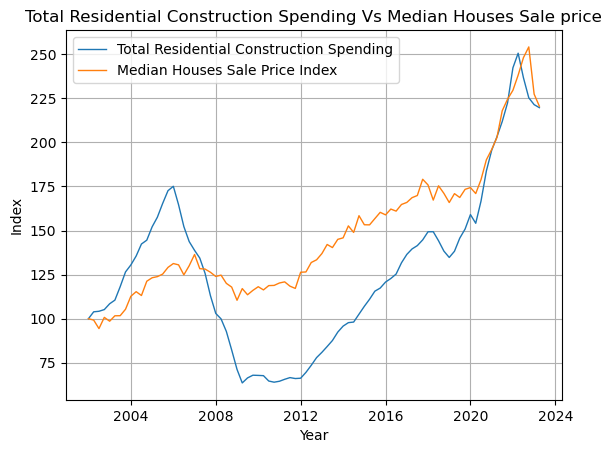

In [9]:
# Total Residential Construction Spending vs Median houses sale price
d = TCSR_HSP_df["DATE"]
x = TCSR_HSP_df["TLRESCONS_NBD20020101"]
y = TCSR_HSP_df["MSPUS_NBD20020101"]

plt.plot(d, x, linewidth=1, label="Total Residential Construction Spending")
plt.plot(d, y, linewidth=1, label="Median Houses Sale Price Index")

plt.title("Total Residential Construction Spending Vs Median Houses Sale price")
plt.ylabel("Index")
plt.xlabel("Year")

ttest = stats.ttest_ind(x, y, equal_var=False)
print(ttest)

plt.legend(loc="best")
plt.grid()

NC_1Q = plt.gcf()
plt.show()
NC_1Q.savefig("Images/NC_Quarterly1.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Ttest_indResult(statistic=-3.0337303559604636, pvalue=0.0028158167943818633)


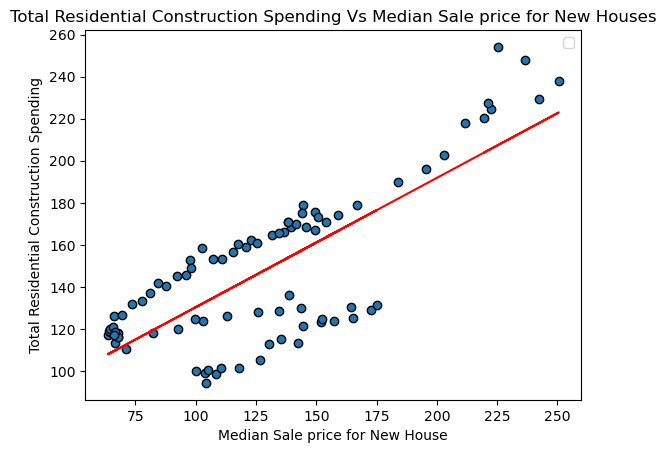

In [10]:
# line regression with scatter plot
d = TCSR_HSP_df["DATE"]
x = TCSR_HSP_df["TLRESCONS_NBD20020101"]
y = TCSR_HSP_df["MSPUS_NBD20020101"]

plt.scatter(x, y, edgecolor="black")

slope, int, r, p, std_err = st.linregress(x, y)
fit = slope * x + int

plt.title("Total Residential Construction Spending Vs Median Sale price for New Houses")
plt.ylabel("Total Residential Construction Spending")
plt.xlabel("Median Sale price for New House")
plt.plot(x,fit, "r-")

ttest = stats.ttest_ind(x, y, equal_var=False)
print(ttest)

plt.legend(loc="best")

NC_2Q = plt.gcf()
plt.show()
NC_2Q.savefig("Images/NC_Quarterly2.png")

In [11]:
#Monthly data 
NHSP_an_path = "Input_Files/Median Sales Price for New Houses Sold Annual Raw.csv"
HSP_an_path = "Input_Files/Median Sales Price of Houses Sold Annual Raw.csv"

data2 = pd.read_csv(NHSP_an_path)
NHa_data_df = pd.DataFrame(data2)
data3 = pd.read_csv(HSP_an_path)
Ha_data_df = pd.DataFrame(data3)
NHa_data_df['DATE'] = NHa_data_df['DATE'].astype('datetime64[D]')
Ha_data_df['DATE'] = Ha_data_df['DATE'].astype('datetime64[D]')

NHSP_HSP = pd.merge(NHa_data_df, Ha_data_df, how="left", on=["DATE"])
NHSP_HSP_df = pd.DataFrame(NHSP_HSP)
#TCSR_NHSP_HSP_Pa_df.dropna(inplace=True)
NHSP_HSP_df.drop(NHSP_HSP_df.tail(1).index,inplace=True)
NHSP_HSP_df.head()

,DATE,MSPNHSUS,MSPUS
0,1963-01-01,17966.666666666667,18050.000000000000
1,1964-01-01,18983.333333333333,18925.000000000000
2,1965-01-01,20150.000000000000,20125.000000000000
3,1966-01-01,21525.000000000000,21500.000000000000
4,1967-01-01,22691.666666666667,22750.000000000000


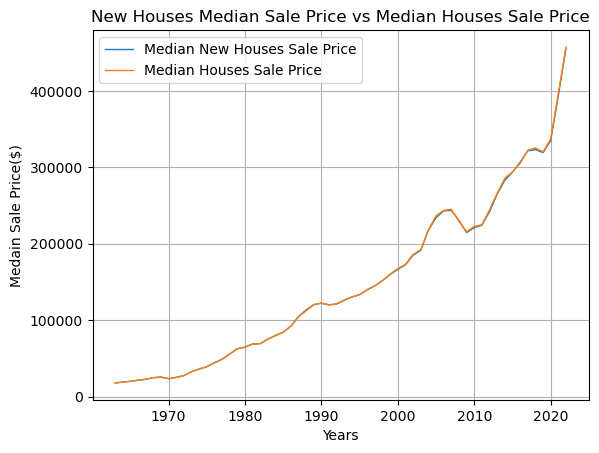

In [12]:
NHSP_HSP_df["MSPNHSUS"] = NHSP_HSP_df["MSPNHSUS"].astype(float)
NHSP_HSP_df["MSPUS"] = NHSP_HSP_df["MSPUS"].astype(float)

date = NHSP_HSP_df["DATE"]
NHSP = NHSP_HSP_df["MSPNHSUS"]
HSP = NHSP_HSP_df["MSPUS"]

plt.plot(date, NHSP, linewidth=1, label="Median New Houses Sale Price")
plt.plot(date, HSP, linewidth=1, label="Median Houses Sale Price")

plt.title("New Houses Median Sale Price vs Median Houses Sale Price")
plt.ylabel("Medain Sale Price($)")
plt.xlabel("Years")
plt.legend(loc="best")
plt.grid()
plt.savefig("Images/NC_AnnualRaw1.png")
plt.show()

Note***Index (scale value to 100) neutralizies values for new houses sold and houses sold to same even if actual values are slightly different

Ttest_indResult(statistic=0.02107842300235454, pvalue=0.9832186993448337)


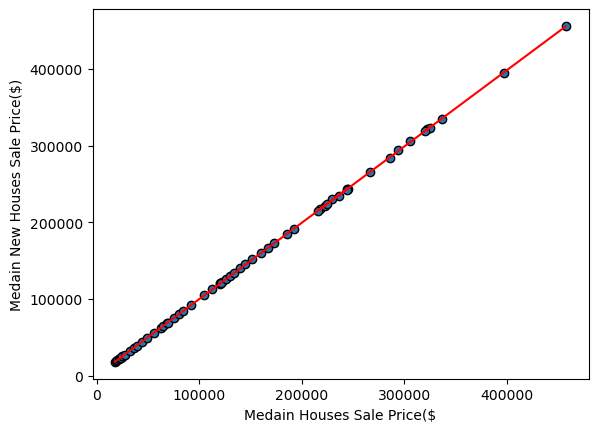

In [13]:
y = NHSP_HSP_df["MSPNHSUS"]
x = NHSP_HSP_df["MSPUS"]

plt.scatter(x, y, edgecolor="black", label="Median New Houses Sale Price")

slope, int, r, p, std_err = st.linregress(x, y)
fit = slope * x + int
plt.plot(x,fit, "r-")

ttest = stats.ttest_ind(x, y, equal_var=False)
print(ttest)

plt.ylabel("Medain New Houses Sale Price($)")
plt.xlabel("Medain Houses Sale Price($")
plt.savefig("Images/NC_AnnualRaw2.png")
plt.show()